<a href="https://colab.research.google.com/github/shakshi-k/My_projects/blob/Main-Projects/Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
# tensorflow_hub is a library and online repository for sharing pre-trained machine learning models in tensorflow.

import numpy as np
import PIL.Image
# PIL.Image is a class from python imaging library. it allows to open, manipulate and save images in python.
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving your_content_image.jpg to your_content_image.jpg
Saving your_style_image.jpg to your_style_image.jpg


In [ ]:
def load_image(path, max_dim = 512):
  # path = finds path to the image, max_dim = maximum dimension to resize the image while keeping its aspect ratio
  img = tf.io.read_file(path)
  # Reads the image file from the given path. it returns the raw bytes
  img = tf.image.decode_image(img, channels = 3)
  # Decodes the raw bytes into tensorflow image tensor, channels = 3 ensures image is decoded as RGB, resulting shape [height, weight,3]
  img = tf.image.convert_image_dtype(img, tf.float32)
  # converts the pixel values from integers to float. this helps neural networks train and predict more effectively.

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  # Gets the shape of image and converts the values to float32
  scale = max_dim / max(shape)
  # computes a scaling factor to ensure largest side becomes max_dim. keeps the image aspect ratio intact.

  new_shape = tf.cast(shape * scale, tf.int32)
  # multiplies original shape by the scaling factor to get the new dimensions. converts to integer since image sizes must be integers.
  img = tf.image.resize(img, new_shape)
  # Resizes the image to the computed new_shape  while maintaining its aspect ratio.
  img = img[tf.newaxis, :]
  # adds an extra dimension at start to make image shape.
  # this is needed because tensorflow models expect batch input even if its just one image.
  return img

In [ ]:
content_image = load_image("your_content_image.jpg")
style_image = load_image("your_style_image.jpg")


In [ ]:
style_transfer_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
stylized_image = style_transfer_model(tf.constant(content_image), tf.constant(style_image))[0]
# [0] so as to get the first thing which is the image itself.

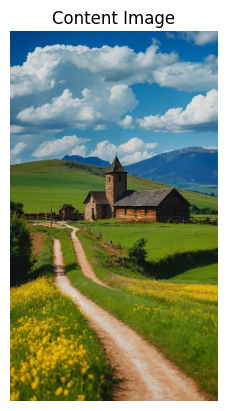

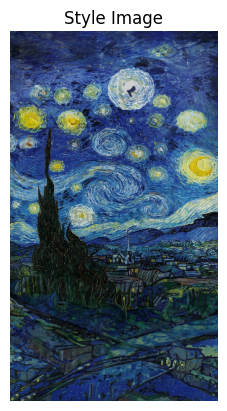

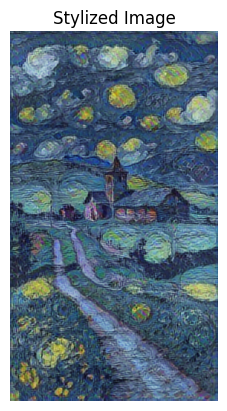

In [ ]:
def show_image(image, title = "Image"):
  image = tf.squeeze(image)
  plt.imshow(image)
  plt.axis('off')
  plt.title(title)
  plt.show()


show_image(content_image, 'Content Image')
show_image(style_image, 'Style Image')
show_image(stylized_image, 'Stylized Image')

In [ ]:
from PIL import Image

output = tf.image.convert_image_dtype(stylized_image, dtype = tf.uint8)
# converts the pixel values from float32 to uint8 which is standard for image files.
output = tf.squeeze(output, axis=0)
output = Image.fromarray(output.numpy())
# converts tensorflow tensor to numpy array. then converts array into PIL image object which can be saved and displayed.
output.save('stylized_output.jpg')

files.download('stylized_output.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>